<a href="https://colab.research.google.com/github/gowripriya15/ML-project-1/blob/main/Predicting_if_a_customer_would_be_signing_a_loan_or_not.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Project-9.csv to Project-9.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
dataset=pd.read_csv(io.BytesIO(uploaded['Project-9.csv']))

In [ ]:
dataset.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   entry_id              17908 non-null  int64  
 1   age                   17908 non-null  int64  
 2   pay_schedule          17908 non-null  object 
 3   home_owner            17908 non-null  int64  
 4   income                17908 non-null  int64  
 5   months_employed       17908 non-null  int64  
 6   years_employed        17908 non-null  int64  
 7   current_address_year  17908 non-null  int64  
 8   personal_account_m    17908 non-null  int64  
 9   personal_account_y    17908 non-null  int64  
 10  has_debt              17908 non-null  int64  
 11  amount_requested      17908 non-null  int64  
 12  risk_score            17908 non-null  int64  
 13  risk_score_2          17908 non-null  float64
 14  risk_score_3          17908 non-null  float64
 15  risk_score_4       

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


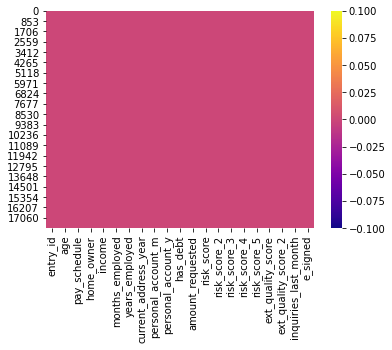

In [ ]:
import seaborn as sns
sns.heatmap(dataset.isnull(),cmap='plasma')

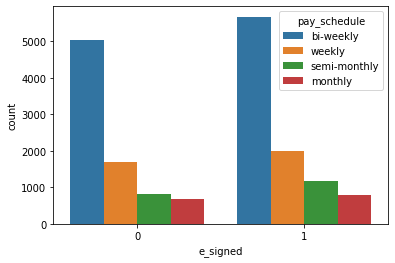

In [ ]:
sns.countplot(x='e_signed',hue='pay_schedule',data=dataset)

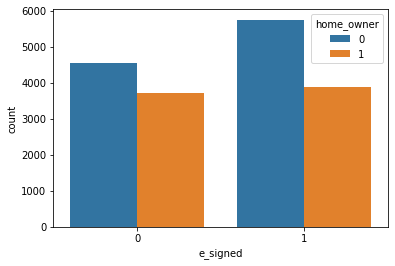

In [ ]:
sns.countplot(x='e_signed',hue='home_owner',data=dataset)

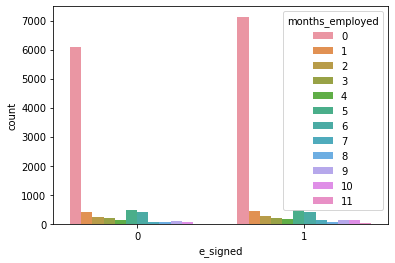

In [ ]:
sns.countplot(x='e_signed',hue='months_employed',data=dataset)

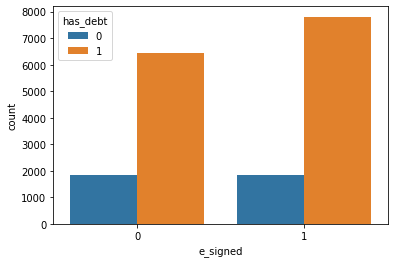

In [ ]:
sns.countplot(x='e_signed',hue='has_debt',data=dataset)

In [ ]:
X = dataset.iloc[:,0:20]  
y = dataset.iloc[:,-1]

In [ ]:
pay=pd.get_dummies(X['pay_schedule'],drop_first=True)
pay

,monthly,semi-monthly,weekly
0,0,0,0
1,0,0,1
2,0,0,1
3,0,0,0
4,0,1,0
...,...,...,...
17903,1,0,0
17904,0,0,0
17905,0,0,1
17906,0,0,0


In [ ]:
X=pd.concat([X,pay],axis=1)
X.drop('pay_schedule',axis=1,inplace=True)
X

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,monthly,semi-monthly,weekly
0,7629673,40,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,0,0,0
1,3560428,61,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,0,1
2,6934997,23,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,0,1
3,5682812,40,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,0,0,0
4,5335819,33,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17903,9949728,31,0,3245,0,5,3,2,6,1,700,71700,0.691126,0.928196,0.664112,0.838012,0.727705,0.627705,2,1,0,0
17904,9442442,46,0,6525,0,2,1,3,3,1,800,51800,0.648525,0.970832,0.699241,0.844724,0.774918,0.474918,3,0,0,0
17905,9857590,46,0,2685,0,5,1,1,8,1,1200,59650,0.677975,0.918141,0.687981,0.939101,0.472045,0.672045,9,0,0,1
17906,8708471,42,0,2515,0,3,5,6,1,1,400,80200,0.642741,0.885684,0.456448,0.686823,0.406568,0.406568,3,0,0,0


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns) 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['features','Score']  
print(featureScores.nlargest(10,'Score'))

                features          Score
11            risk_score  514968.975244
0               entry_id  157188.303054
10      amount_requested   44498.468276
3                 income   10916.799899
1                    age     552.148409
7     personal_account_m     169.219903
18  inquiries_last_month      23.693774
2             home_owner      23.136657
20          semi-monthly      18.636687
6   current_address_year      13.612249


In [ ]:
X.drop('entry_id',axis=1,inplace=True)
X

,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,monthly,semi-monthly,weekly
0,40,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,0,0,0
1,61,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,0,1
2,23,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,0,1
3,40,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,0,0,0
4,33,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17903,31,0,3245,0,5,3,2,6,1,700,71700,0.691126,0.928196,0.664112,0.838012,0.727705,0.627705,2,1,0,0
17904,46,0,6525,0,2,1,3,3,1,800,51800,0.648525,0.970832,0.699241,0.844724,0.774918,0.474918,3,0,0,0
17905,46,0,2685,0,5,1,1,8,1,1200,59650,0.677975,0.918141,0.687981,0.939101,0.472045,0.672045,9,0,0,1
17906,42,0,2515,0,3,5,6,1,1,400,80200,0.642741,0.885684,0.456448,0.686823,0.406568,0.406568,3,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

**LOGISTIC REGRESSION CLASSIFIER**

In [ ]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(y_pred)

[1 1 1 ... 1 1 1]


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cn=confusion_matrix(y_test,y_pred)
print(cn)
accuracy_score(y_test,y_pred)

[[1039 1448]
 [ 805 2081]]


0.5806811836962591

**DECISION TREE CLASSIFIER**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion = 'entropy')
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
print(y_pred)
DecisionTreeClassifier(criterion='entropy')
cn=confusion_matrix(y_test,y_pred)
print(cn)
accuracy_score(y_test,y_pred)

[1 1 1 ... 1 1 0]
[[1290 1197]
 [1155 1731]]


0.5622557230597431

**RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators =100, criterion = 'entropy')
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
print(y_pred)
cn=confusion_matrix(y_test,y_pred)
print(cn)
RandomForestClassifier(criterion='entropy', n_estimators=20)
accuracy_score(y_test,y_pred)


[1 1 0 ... 1 1 0]
[[1386 1101]
 [ 885 2001]]


0.6303740926856505

**GAUSSIAN NAIVE BAYES CLASSIFIER** 

In [ ]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train, y_train)  
y_pred = gnb.predict(X_test)  
cn=confusion_matrix(y_test,y_pred)
print(cn)
accuracy_score(y_test,y_pred)

[[1277 1210]
 [1096 1790]]


0.5708170482039828

**XGBOOST CLASSIFIER**

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
classifier = XGBClassifier(learning_rate=0.1, n_estimators=20, max_depth=5,
                        min_child_weight=3, gamma=0.2, subsample=0.6, colsample_bytree=1.0,
                        objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
print(y_pred)
from sklearn.metrics import confusion_matrix,accuracy_score
cn=confusion_matrix(y_test,y_pred)
print(cn)
accuracy_score(y_test,y_pred)

[1 1 0 ... 1 1 1]
[[1284 1203]
 [ 767 2119]]


0.6333519449097339

**CATBOOST CLASSIFIER**

In [ ]:
import catboost as ctb
from catboost import CatBoostClassifier
classifier= CatBoostClassifier(loss_function='Logloss',eval_metric='AUC',nan_mode='Min',thread_count=8,task_type='CPU')
classifier.fit(X_train,y_train,verbose=False)

In [ ]:
y_pred=classifier.predict(X_test)
print(y_pred)
from sklearn.metrics import confusion_matrix,accuracy_score
cn=confusion_matrix(y_test,y_pred)
print(cn)
accuracy_score(y_test,y_pred)

[1 1 0 ... 1 1 0]
[[1430 1057]
 [ 823 2063]]


0.6501023636702029